In [1]:
from google.colab import files
uploaded = files.upload()

Saving my_dataset.npz to my_dataset.npz


In [2]:
# load data
import numpy as np

data    = np.load("/content/my_dataset.npz")
trainX = data['x_train']
trainY = data['y_train']
testX = data['x_test']
testY = data['y_test']
print( trainX.shape)
print(testX.shape)

(2084, 28, 28, 1)
(522, 28, 28, 1)


In [3]:
# normalize
trainX = trainX.astype("float32")/255.0
testX  = testX.astype("float32")/255.0

In [5]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model

inputs = Input((28,28))
x = Flatten()(inputs)
x1 = Dense(128, activation="relu")(x)
x2 = Dense(256,  activation="relu")(x1)
x3 = Dense(128,  activation="relu")(x2)
x4 = Dense(128,  activation="relu")(x3)
outputs = Dense(10, activation="softmax")(x4)
model = Model(inputs, outputs)

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    trainX, trainY,
    epochs=300,
    batch_size=32,
    validation_data=(testX, testY)
)

In [11]:
from sklearn.metrics import accuracy_score

probablityY = model.predict(testX)
predictedY = probablityY.argmax(axis=1)

acc = accuracy_score(testY, predictedY)

print("Test Accuracy:", float(acc))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Test Accuracy: 0.7950191570881227


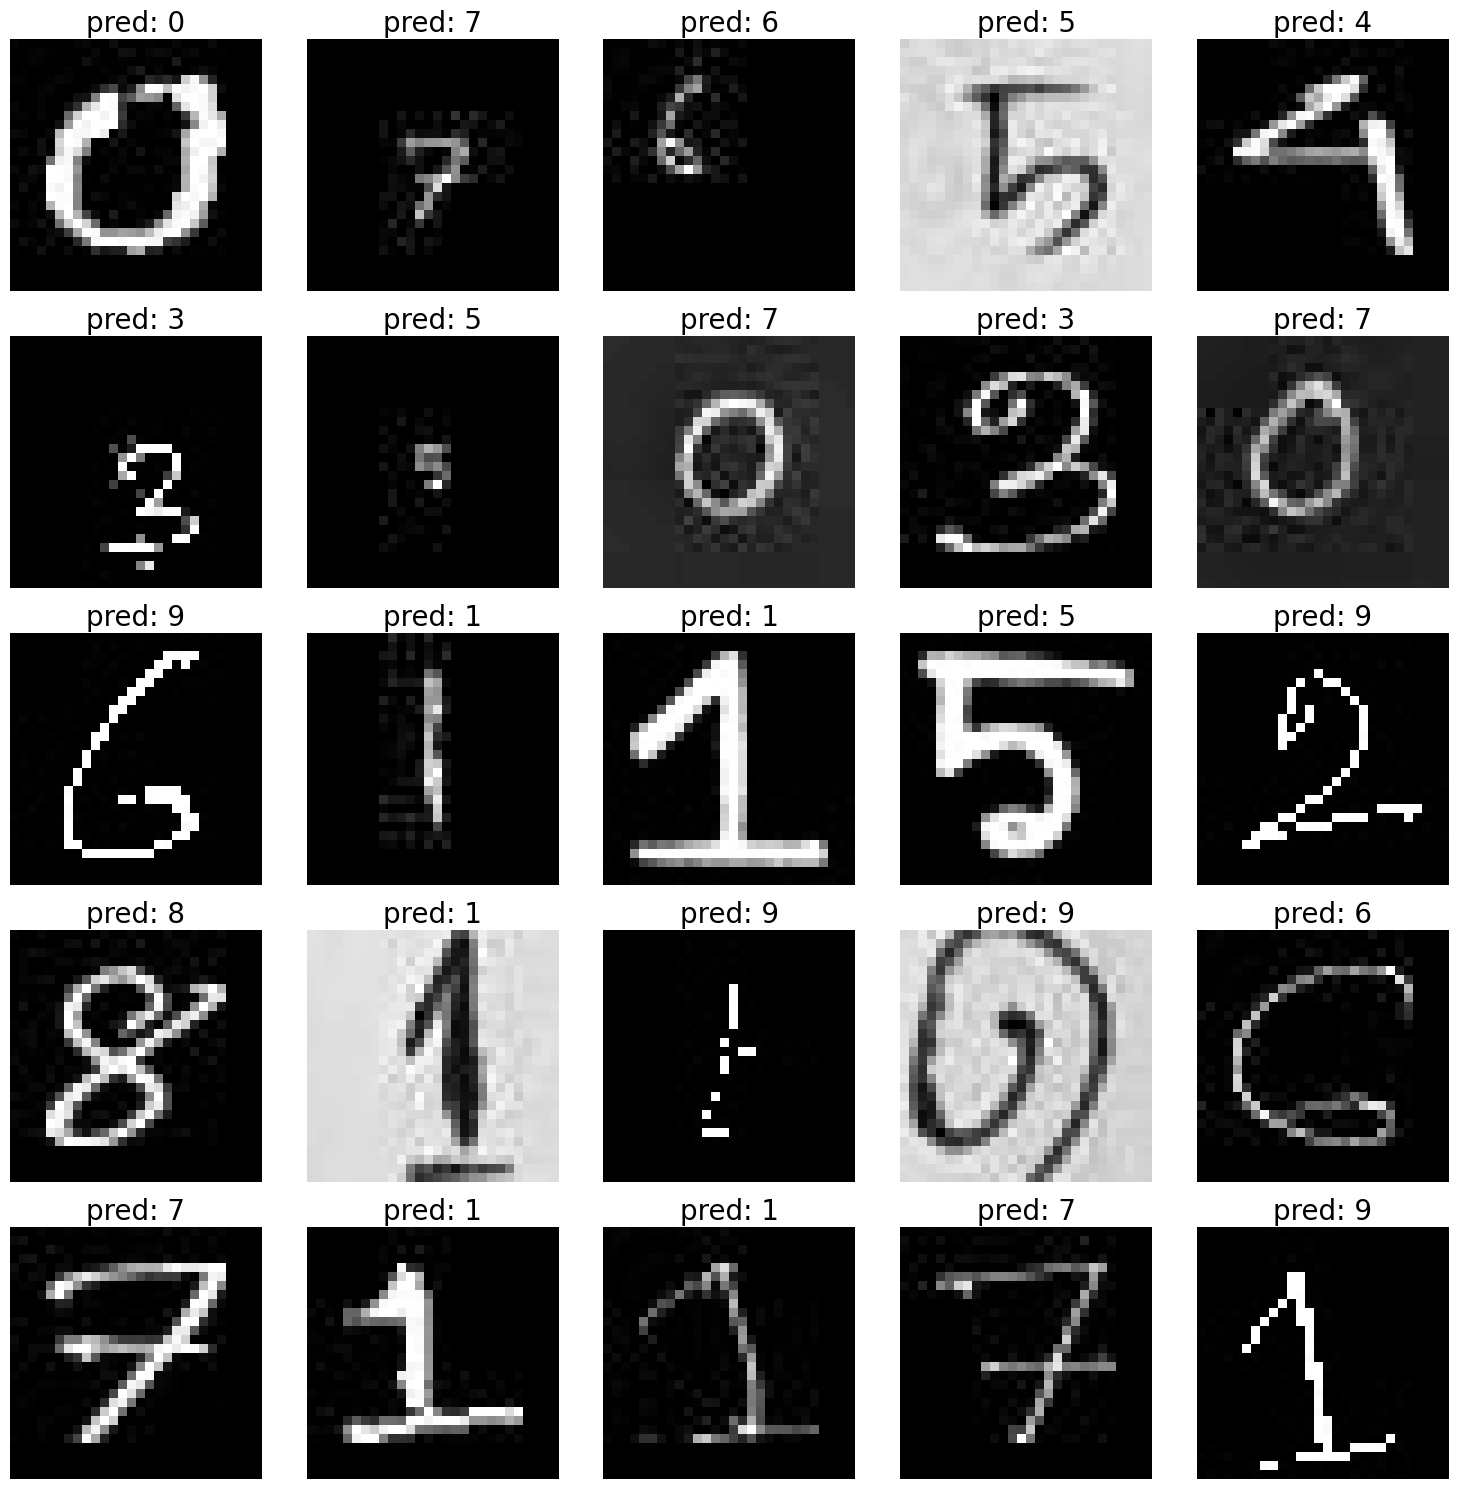

In [12]:
# plot digits
import matplotlib.pyplot as plt


plt.figure(figsize=(15,15))
n_show = min(25, len(trainX))

rows, cols = 5, 5

for i in range(n_show):
    plt.subplot(rows, cols, i+1)
    sample = testX[i].reshape(1, 28, 28, 1)

    pred = model.predict(sample, verbose=0).argmax(axis=1)[0]
    plt.title(f"pred: {pred}", fontsize=20)

    plt.imshow(testX[i], cmap="gray")
    plt.axis('off')

plt.tight_layout()
plt.show()